# 1️⃣ Ingesta de Datos (Python)

Carga inicial del dataset Global Superstore desde archivo CSV. Exploración preliminar de la estructura de datos, dimensiones y tipos de datos.

In [3]:
import pandas as pd
import numpy as np

# Importar dataset CSV
df = pd.read_csv('C:\\Users\\vengb\\Desktop\\Superstore\\data\\raw\\superstore.csv')

# Inspección inicial (shape, info)
print("Shape del DataFrame:", df.shape)
print("\nInformación del DataFrame:")
df.info()

# Análisis exploratorio básico
print("\nPrimeras 5 filas:")
display(df.head())

Shape del DataFrame: (51290, 27)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID         

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


# 2️⃣ Limpieza y Transformación (Python - Pandas)

Procesamiento exhaustivo de datos: validación de calidad, tratamiento de valores nulos, conversión de tipos y normalización de información.

In [4]:
# Detectar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar duplicados
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"\nSe encontraron {duplicate_count} duplicados. Eliminando...")
    df.drop_duplicates(inplace=True)
else:
    print("\nNo se encontraron duplicados.")

# Convertir tipos de datos (Fechas)
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')

# Normalizar columnas
df.columns = df.columns.str.lower().str.replace('.', '_')
print("\nNombres de columnas normalizados:", df.columns.tolist())

# Validar rangos numéricos (Sales y Quantity > 0)
invalid_sales = df[df['sales'] <= 0]
invalid_quantity = df[df['quantity'] <= 0]

if not invalid_sales.empty:
    print(f"\nAdvertencia: Se encontraron {len(invalid_sales)} registros con ventas inválidas (<= 0).")
if not invalid_quantity.empty:
    print(f"Advertencia: Se encontraron {len(invalid_quantity)} registros con cantidad inválida (<= 0).")

# Verificar consistencia
print("\nInformación del DataFrame después de la limpieza:")
df.info()

Valores nulos por columna:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

No se encontraron duplicados.

Nombres de columnas normalizados: ['category', 'city', 'country', 'customer_id', 'customer_name', 'discount', 'market', '记录数', 'order_date', 'order_id', 'order_priority', 'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state', 'sub_category', 'year', 'market2', 'weeknum']

Advertencia: Se encontraro

# 3️⃣ Feature Engineering (Python - Pandas)

Creación de nuevas variables calculadas y dimensiones temporales para enriquecer el análisis y facilitar la generación de insights.

In [5]:
# Extraer Año, Mes, Trimestre
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_quarter'] = df['order_date'].dt.quarter

# Calcular margen de beneficio (%)
df['profit_margin'] = (df['profit'] / df['sales']) * 100

# Calcular días de envío
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

# Categorizar descuentos
def categorize_discount(discount):
    if discount == 0:
        return 'No Discount'
    elif discount < 0.2:
        return 'Low'
    else:
        return 'High'

df['discount_category'] = df['discount'].apply(categorize_discount)

# Tipología de Pedido (Rentable vs No Rentable)
df['is_profitable'] = np.where(df['profit'] > 0, 1, 0)

# Segmentación por Ventas (High/Low Value)
sales_threshold = df['sales'].quantile(0.75)
df['order_value_segment'] = np.where(df['sales'] > sales_threshold, 'High Value', 'Standard Value')


print("\nNuevas columnas generadas:", ['order_year', 'order_month', 'order_quarter', 'profit_margin', 'shipping_days', 'discount_category', 'is_profitable', 'order_value_segment'])
print("\nPrimeras 5 filas con nuevas features:")
display(df.head())


Nuevas columnas generadas: ['order_year', 'order_month', 'order_quarter', 'profit_margin', 'shipping_days', 'discount_category', 'is_profitable', 'order_value_segment']

Primeras 5 filas con nuevas features:


,category,city,country,customer_id,customer_name,discount,market,记录数,order_date,order_id,...,market2,weeknum,order_year,order_month,order_quarter,profit_margin,shipping_days,discount_category,is_profitable,order_value_segment
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,North America,2,2011,1,1,49.111579,2,No Discount,1,Standard Value
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,North America,4,2011,1,1,48.909474,5,No Discount,1,Standard Value
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,North America,32,2011,8,3,46.865714,4,No Discount,1,Standard Value
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,North America,32,2011,8,3,47.982703,4,No Discount,1,Standard Value
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,North America,40,2011,9,3,51.840000,4,No Discount,1,Standard Value


# 4️⃣ Análisis Exploratorio de Datos (EDA)

Visualizaciones clave para entender el comportamiento de ventas, beneficios y logística.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

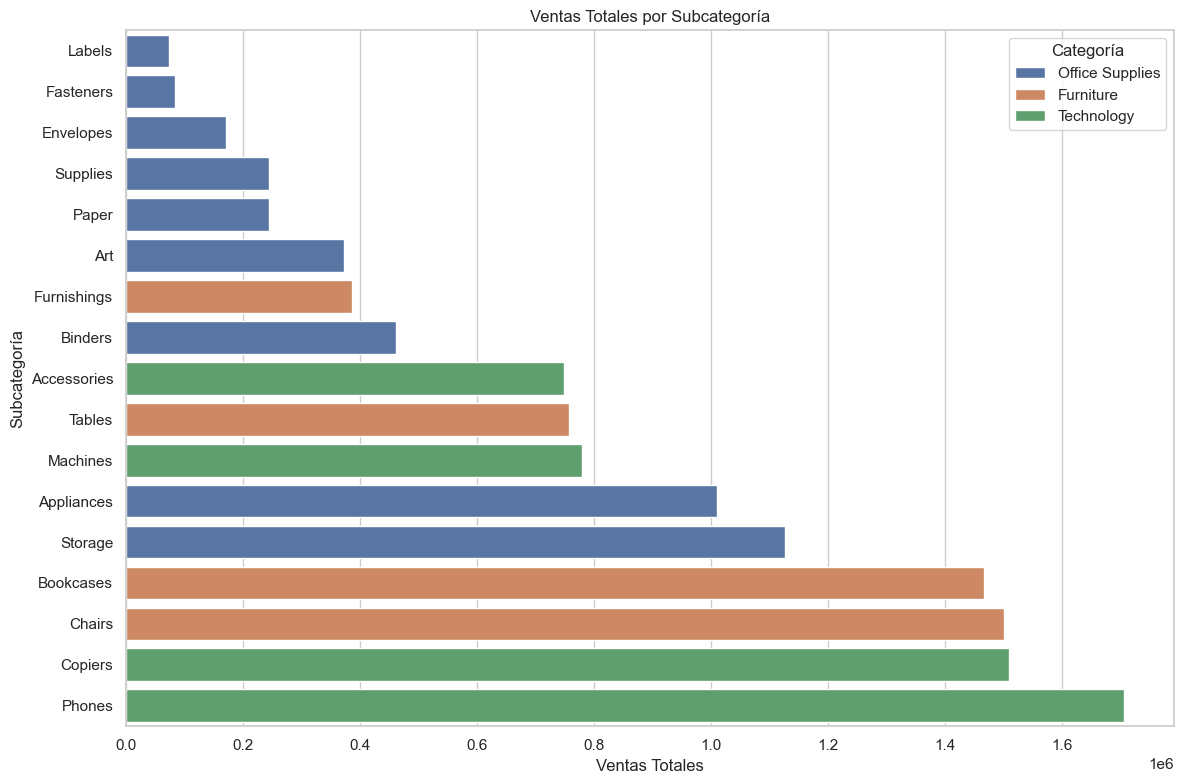

In [7]:
# 1. Ventas por Categoría y Subcategoría
plt.figure(figsize=(12, 8))
cat_sales = df.groupby(['category', 'sub_category'])['sales'].sum().sort_values(ascending=True).reset_index()

sns.barplot(x='sales', y='sub_category', hue='category', data=cat_sales, dodge=False)
plt.title('Ventas Totales por Subcategoría')
plt.xlabel('Ventas Totales')
plt.ylabel('Subcategoría')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

C:\Users\vengb\AppData\Local\Temp\ipykernel_12256\2011550431.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()


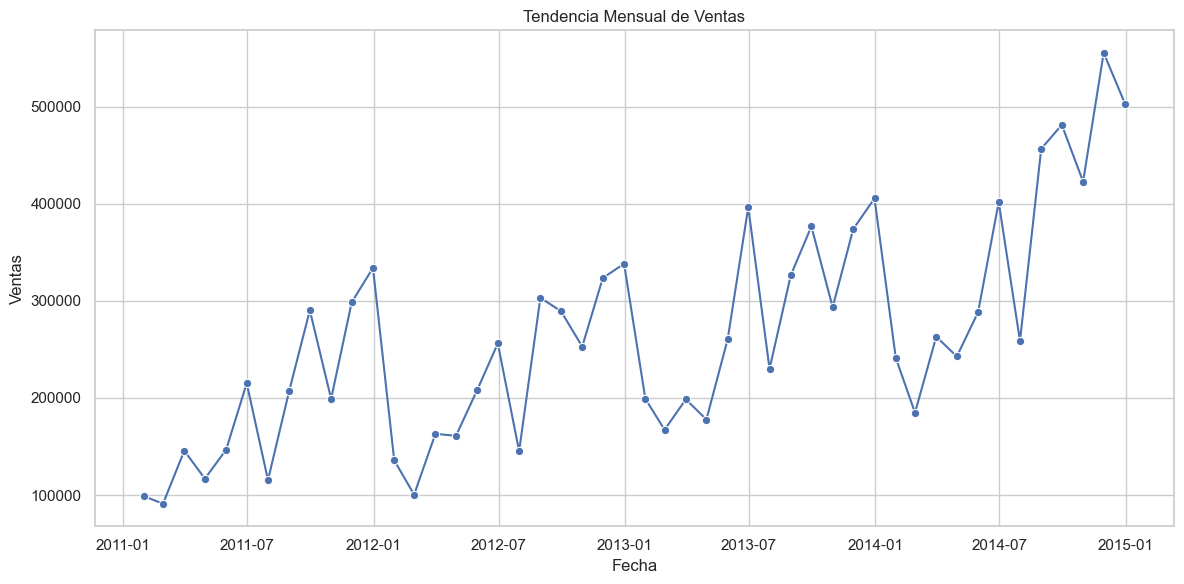

In [8]:
# 2. Tendencia Mensual de Ventas
plt.figure(figsize=(12, 6))
monthly_sales = df.set_index('order_date').resample('M')['sales'].sum().reset_index()

sns.lineplot(x='order_date', y='sales', data=monthly_sales, marker='o', color='b')
plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

C:\Users\vengb\AppData\Local\Temp\ipykernel_12256\3893275887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='profit', data=region_profit, palette=colors)


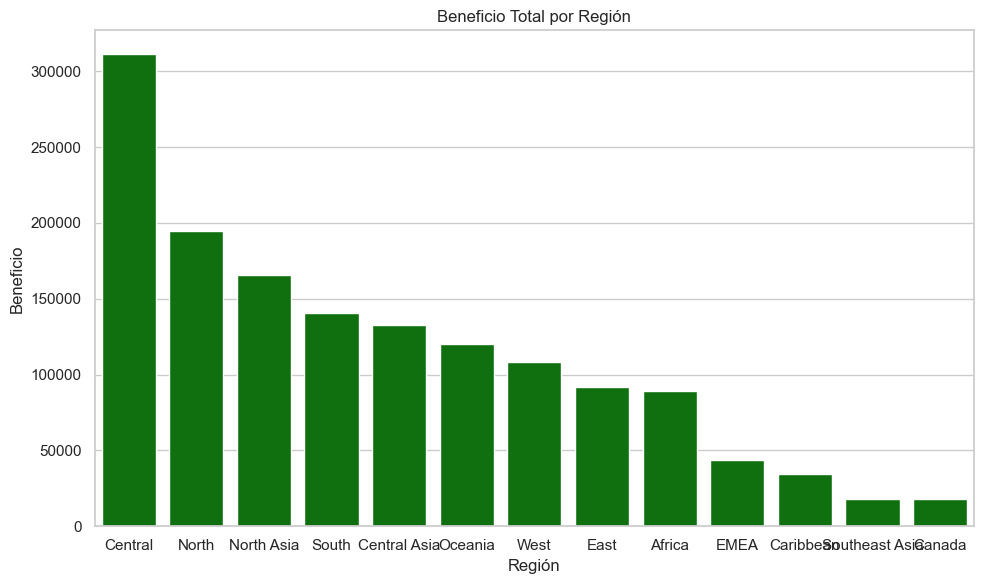

In [9]:
# 3. Beneficio Total por Región
plt.figure(figsize=(10, 6))
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()
# Colorear barras (verde si positivo, rojo si negativo)
colors = ['green' if x >= 0 else 'red' for x in region_profit['profit']]

sns.barplot(x='region', y='profit', data=region_profit, palette=colors)
plt.title('Beneficio Total por Región')
plt.xlabel('Región')
plt.ylabel('Beneficio')
plt.tight_layout()
plt.show()

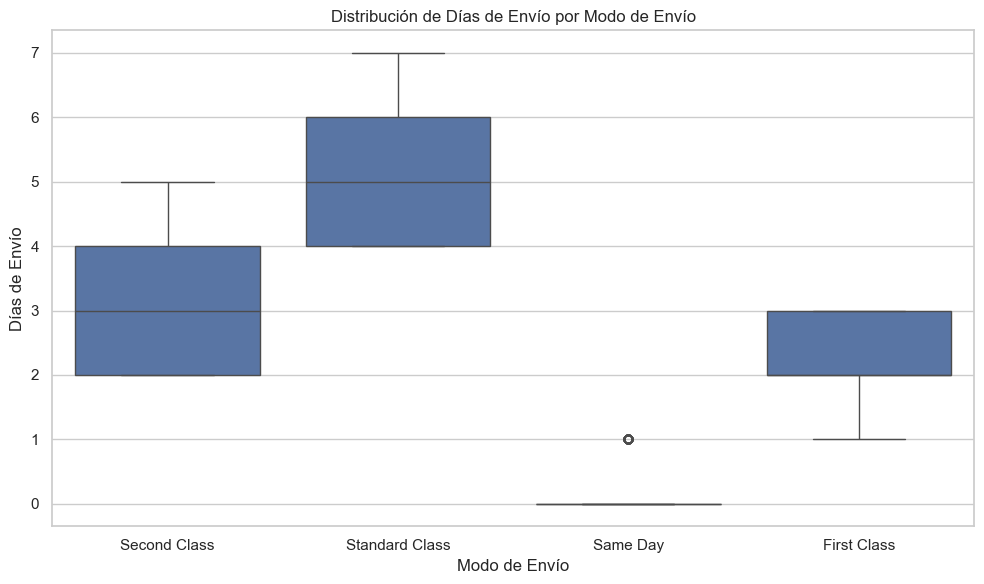

In [10]:
# 4. Distribución de Días de Envío por Modo de Envío
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_mode', y='shipping_days', data=df)
plt.title('Distribución de Días de Envío por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Días de Envío')
plt.tight_layout()
plt.show()

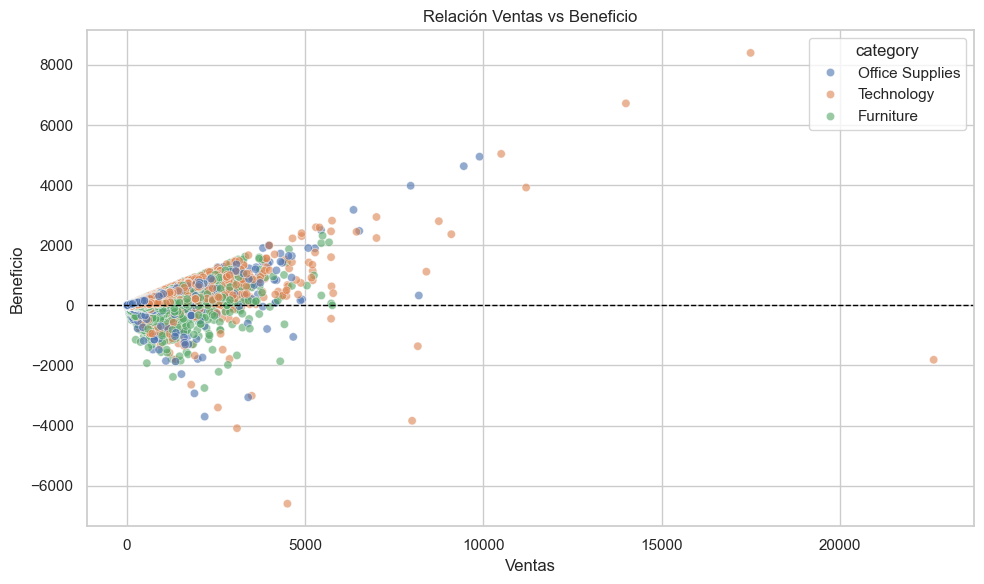

In [11]:
# 5. Relación Ventas vs Beneficio (Nivel Pedido)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', hue='category', data=df, alpha=0.6)
plt.title('Relación Ventas vs Beneficio')
plt.xlabel('Ventas')
plt.ylabel('Beneficio')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()